In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/bike_rental.csv")

In [ ]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

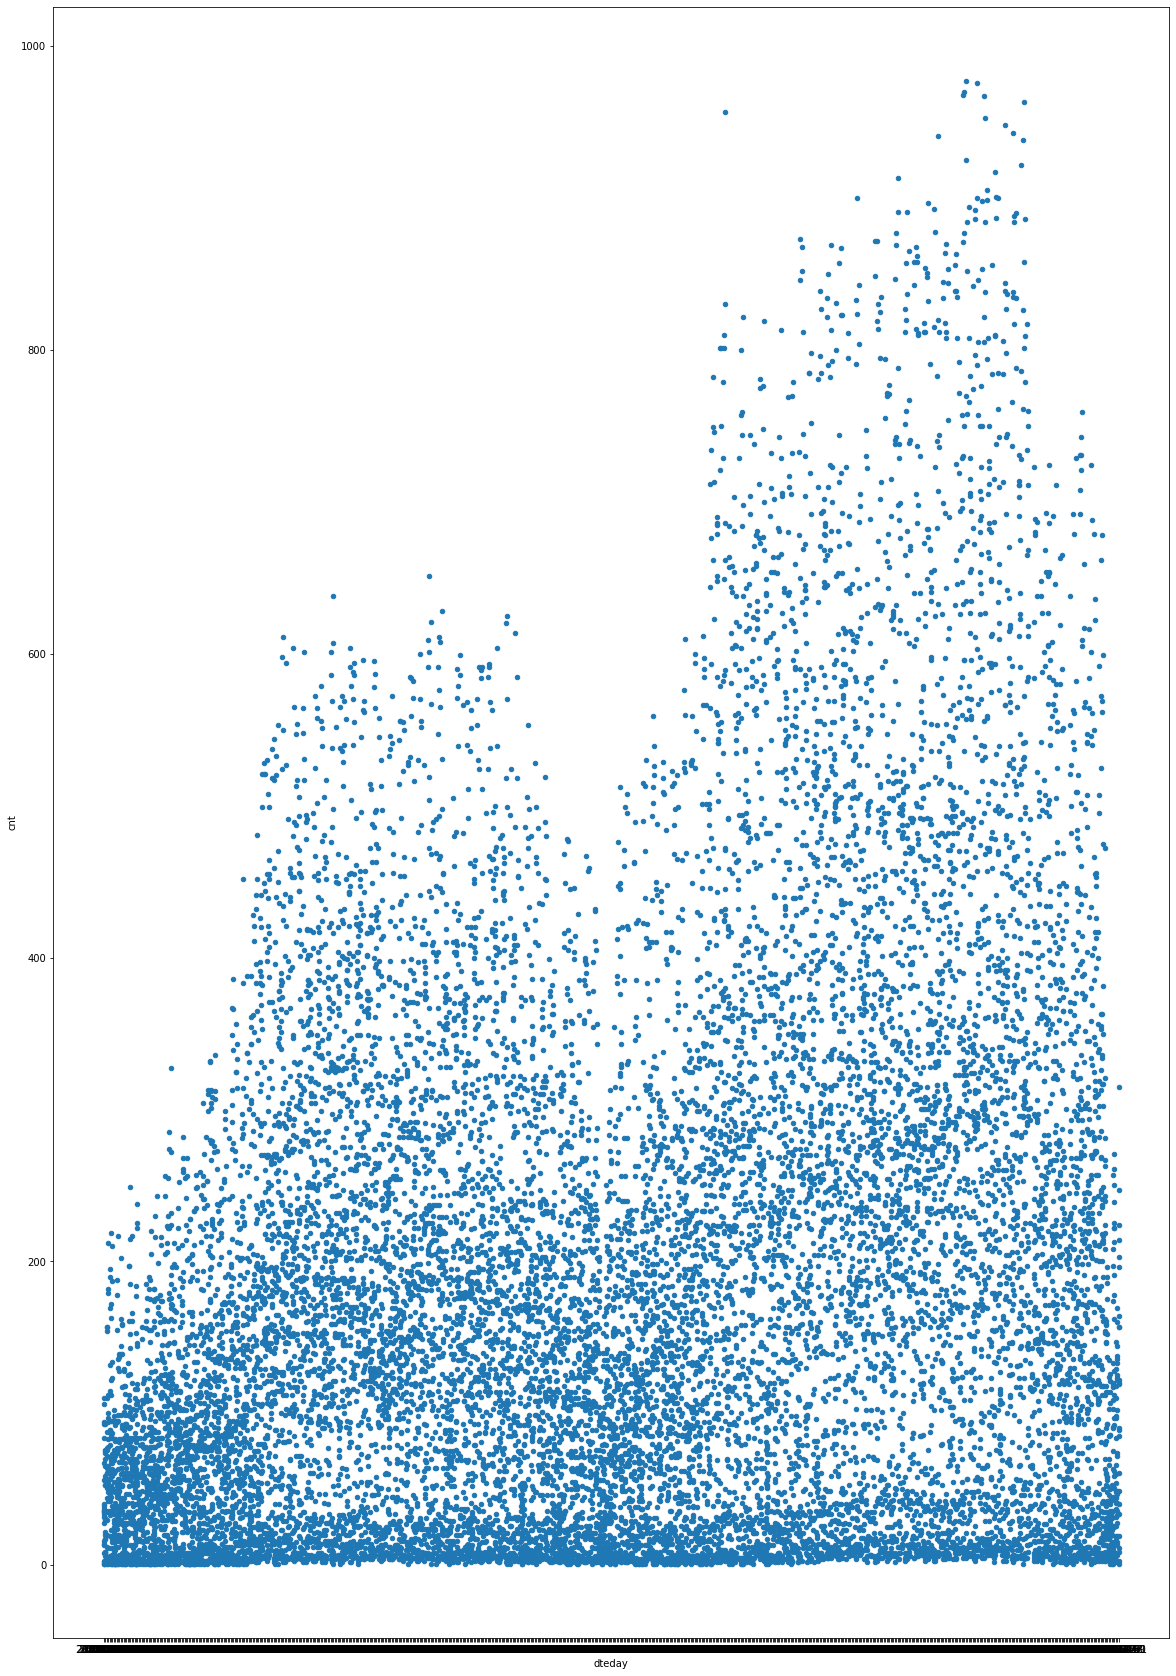

In [37]:
df.plot(x='dteday',y='cnt',kind='scatter',figsize=(20,30))

<AxesSubplot:>

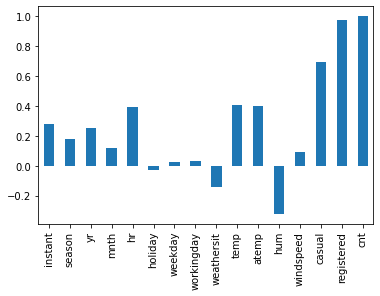

In [38]:
df.corrwith(df['cnt']).plot(kind='bar')

In [39]:
x=df[['hr','temp','atemp','hum','instant','season','yr','holiday','weekday','workingday','weathersit','windspeed']]
y=df['cnt']

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [42]:
reg=DecisionTreeRegressor(max_depth=50)
reg.fit(xtrain,ytrain)

ValueError: Number of labels=3476 does not match number of samples=13903

In [ ]:
ypred=reg.predict(xtest)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 72. 518.   3. ... 189. 100. 779.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print("Score",reg.score(xtest,ytest)*100)
print("Mae",mean_absolute_error(ytest,ypred))
print("Mse",mean_squared_error(ytest,ypred))
print("All data score",reg.sore(x,y)*100)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 72. 518.   3. ... 189. 100. 779.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df['pred']=reg.predict(x)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

KeyError: 'pred'

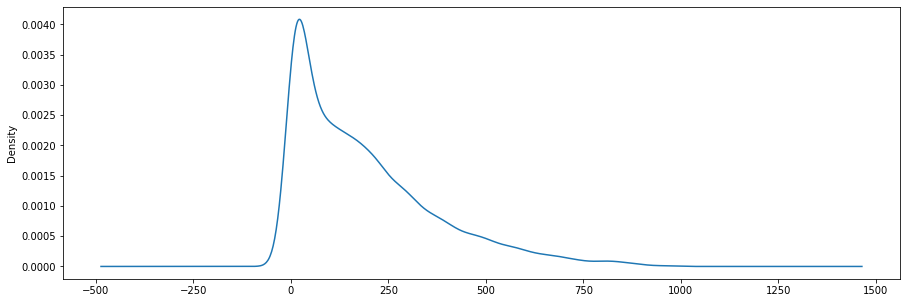

In [ ]:
df['cnt'].plot(kind='kde',figsize=(15,5))
df['pred'].plot(kind='kde',figsize=(15,5))
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

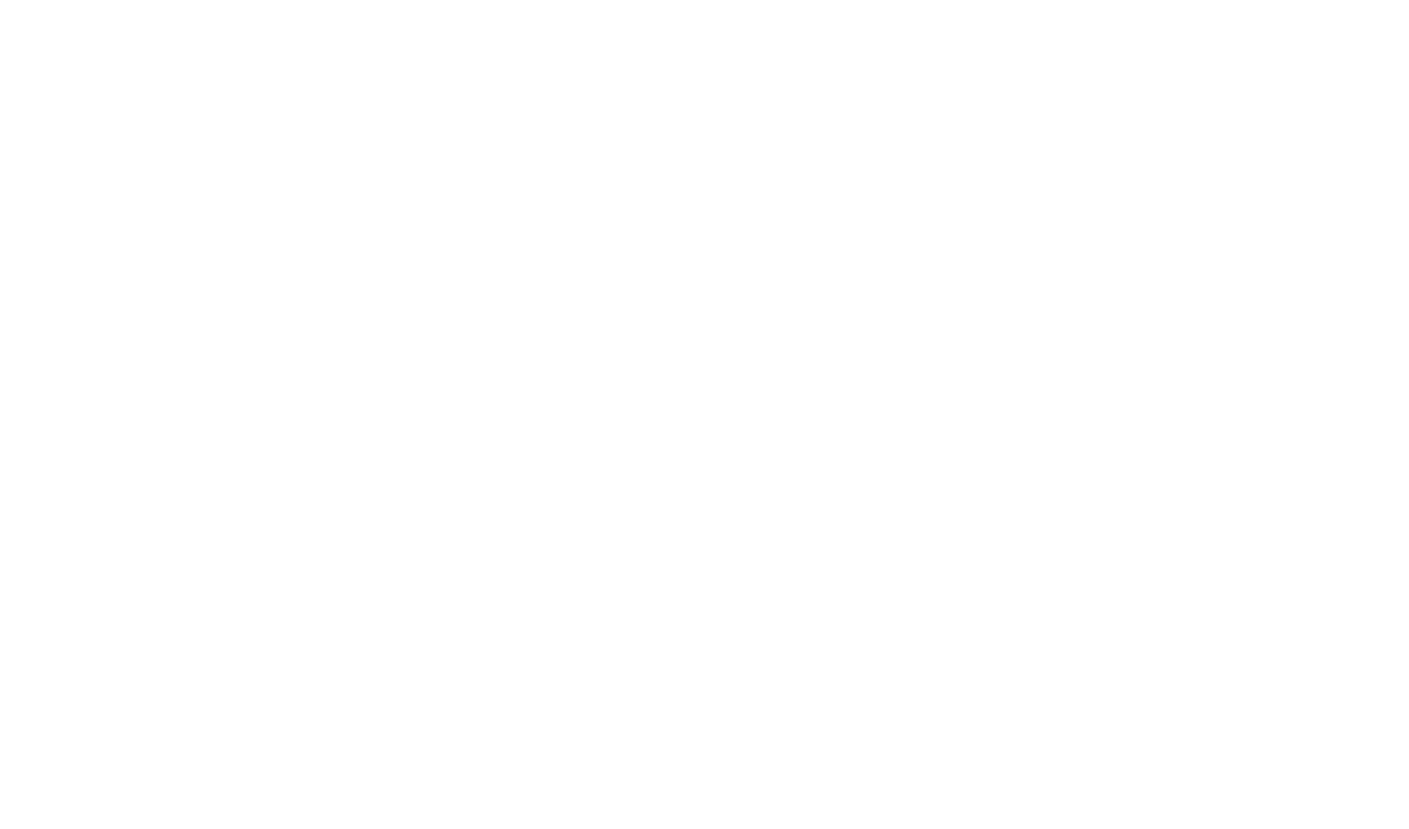

In [ ]:
plt.figure(figsize=(25,15))
plot_tree(reg,max_depth=5,fontsize=12)
plt.show()